# Font 파일 추가 방법
`dartwork_mpl/asset/font` 위치에 폰트 파일들 추가한 뒤 dartwork_mpl 로 Import 하면 됨.



In [17]:
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import dartwork_mpl as dm

# asset/font에 들어있는 Font 확인 

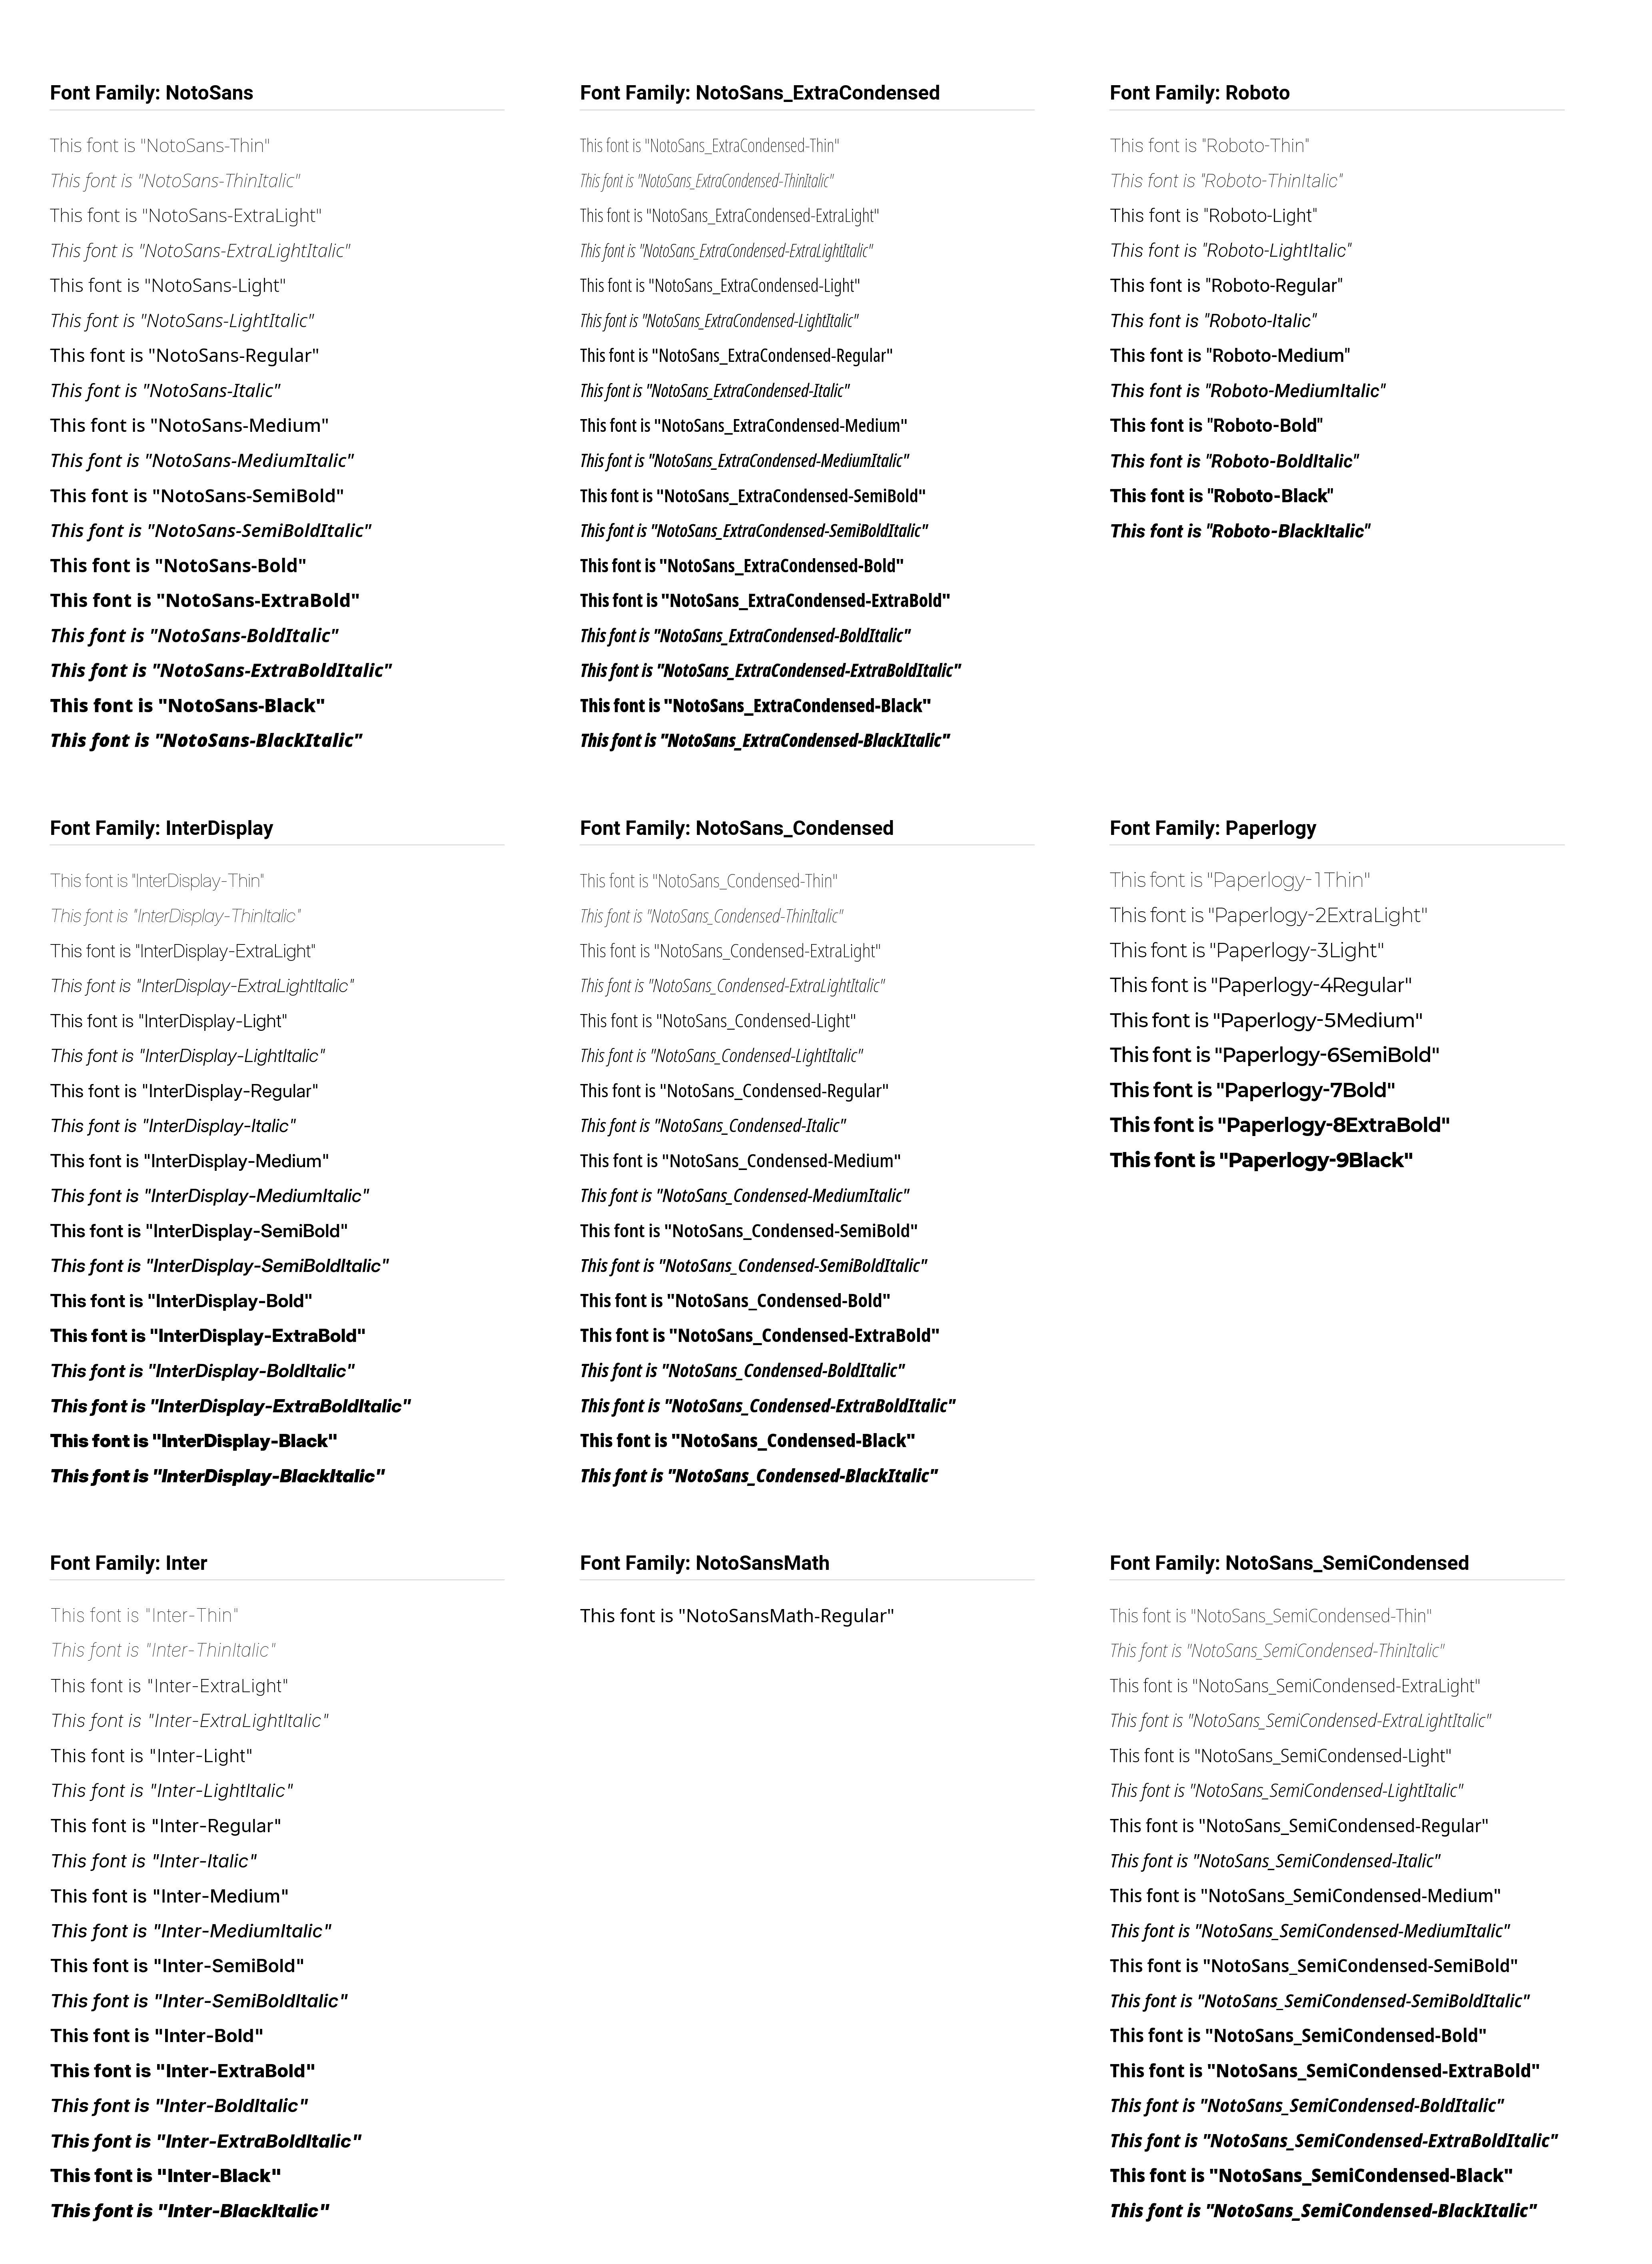

In [34]:
import math
from collections import defaultdict

# 폰트 디렉토리 경로
font_dir = "../src/dartwork_mpl/asset/font"
# 폰트 파일 리스트 가져오기
font_files = [f for f in os.listdir(font_dir) if f.endswith(".ttf")]

# 폰트 패밀리별로 그룹화
font_families = defaultdict(list)
for font in font_files:
    family = font.split("-")[0]
    font_families[family].append(font)


# 각 패밀리 내에서 폰트 정렬 함수
def sort_fonts(fonts):
    weight_order = {
        "Thin": 1,
        "ExtraLight": 2,
        "Light": 3,
        "Regular": 4,
        "Medium": 5,
        "SemiBold": 6,
        "Bold": 7,
        "ExtraBold": 8,
        "Black": 9,
    }

    def get_weight_score(font):
        base_weight = 4  # Regular 기본값
        italic_score = 0.5 if "Italic" in font else 0

        for weight, score in weight_order.items():
            if weight in font:
                base_weight = score
                break

        return (base_weight, italic_score)

    return sorted(fonts, key=get_weight_score)


# 패밀리별로 정렬
sorted_families = sorted(font_families.items())

# 전체 폰트 개수와 열 수 설정
num_columns = 3
total_families = len(sorted_families)
families_per_column = math.ceil(total_families / num_columns)

# 패밀리 간 간격 설정
family_spacing = 3  # 패밀리 간 간격
max_fonts_in_family = max(len(fonts) for _, fonts in sorted_families)

# 그래프 크기 설정 (패밀리 간 간격 포함)
total_height = families_per_column * (max_fonts_in_family + family_spacing)
plt.figure(figsize=(14, total_height * 0.3))

# 폰트 크기 설정
font_size = 11

# 각 열별로 폰트 패밀리 출력
for family_idx, (family, fonts) in enumerate(sorted_families):
    # 열과 행 위치 계산
    column = family_idx // families_per_column
    family_row = family_idx % families_per_column

    # x 위치는 열 번호에 따라 조정
    x_pos = column * 7

    # y 위치 계산 (패밀리 간 간격 포함)
    base_y_pos = family_row * (max_fonts_in_family + family_spacing)

    # 패밀리 제목 출력 (밑줄 추가)
    title_y = base_y_pos + max_fonts_in_family + 0.5
    plt.text(x_pos, title_y, f"Font Family: {family}", size=12, weight="bold")
    plt.plot(
        [x_pos, x_pos + 6],
        [title_y - 0.3, title_y - 0.3],
        color="lightgray",
        linestyle="-",
        linewidth=0.5,
    )

    # 정렬된 폰트 출력
    sorted_fonts = sort_fonts(fonts)
    for font_idx, font_file in enumerate(sorted_fonts):
        font_path = os.path.join(font_dir, font_file)
        font_name = os.path.splitext(font_file)[0]

        font_prop = fm.FontProperties(fname=font_path)

        y_pos = base_y_pos + (max_fonts_in_family - font_idx - 1)

        plt.text(
            x_pos,
            y_pos,
            f'This font is "{font_name}"',
            fontproperties=font_prop,
            size=font_size,
        )

plt.ylim(-1, total_height)
plt.xlim(-0.5, 21)
plt.axis("off")
plt.tight_layout()
plt.show()

# 1. 수식 생성

In [2]:
def apply_math_font(font):
    dm.use_style("dmpl_light")
    plt.rcParams["mathtext.fontset"] = "custom"
    plt.rcParams["mathtext.rm"] = font
    plt.rcParams["mathtext.it"] = font + ":italic"
    plt.rcParams["mathtext.bf"] = font + ":bold"
    plt.rcParams["mathtext.sf"] = font
    plt.rcParams["mathtext.tt"] = font
    plt.rcParams["mathtext.fallback"] = "None"
    plt.rcParams["mathtext.default"] = "it"


apply_math_font("inter")
fontsize = 10

latex_texts = [
    r"\int_{-\infty}^{\infty} e^{-x^2} dx",
    r"\sum_{i=1}^{n} i^2 = \frac{n(n+1)(2n+1)}{6}",
    r"\hat{y} = \beta_0 + \beta_1 x + \epsilon",
    r"\int_{-\infty}^{\infty} e^{-x^2} dx",
    r"\sum_{i=1}^{n} i^2 = \frac{n(n+1)(2n+1)}{6}",
    r"\hat{y} = \beta_0 + \beta_1 x + \epsilon",
    r"a_i^n + b_i^n = c_i^n",
]


# LaTeX 문자 생성 코드.
max_len = max(len(latex_text) for latex_text in latex_texts)
unit = fontsize / 72
fig = plt.figure(figsize=(0.25 * max_len * unit, 3 * unit * len(latex_texts)))

for i, latex_text in enumerate(latex_texts):
    y = 0.9 - i * 0.8 / (len(latex_texts) - 1)
    fig.text(
        0.1,
        y,
        "$" + latex_text + "$",
        ha="left",
        va="center",
        fontdict={
            "size": fontsize,
        },
    )

dm.save_and_show(fig)

# 2. 폰트 테스트

In [3]:
# weight = ['ultralight', 'light', 'regular', 'medium', 'normal', 'bold', 'heavy']
weight = [w for w in range(100, 1001, 100)]

fig = plt.figure(figsize=(4, 4))


for i, w in enumerate(weight):
    fig.text(
        0.1,
        0.9 - i * 0.8 / (len(weight) - 1),
        f"Dartwork ({w})",
        ha="left",
        va="center",
        fontdict={
            "size": 20,
            "weight": w,
            "family": "inter",
        },
    )

dm.save_and_show(fig)

In [4]:
weight = [w for w in range(100, 1001, 100)]

fig = plt.figure(figsize=(4, 4))


for i, w in enumerate(weight):
    fig.text(
        0.1,
        0.9 - i * 0.8 / (len(weight) - 1),
        f"Dartwork ({w})",
        ha="left",
        va="center",
        fontdict={
            "size": 20,
            "weight": w,
            "family": "inter",
            "style": "italic",
        },
    )

dm.save_and_show(fig)

In [5]:
weight = [w for w in range(100, 1001, 100)]

fig = plt.figure(figsize=(4, 4))


for i, w in enumerate(weight):
    fig.text(
        0.1,
        0.9 - i * 0.8 / (len(weight) - 1),
        f"Dartwork ({w})",
        ha="left",
        va="center",
        fontdict={
            "size": 20,
            "weight": w,
            "family": "noto sans",
            # 'style': 'italic',
        },
    )

dm.save_and_show(fig)

In [6]:
weight = [w for w in range(100, 1001, 100)]

fig = plt.figure(figsize=(4, 4))


for i, w in enumerate(weight):
    fig.text(
        0.1,
        0.9 - i * 0.8 / (len(weight) - 1),
        f"Dartwork ({w})",
        ha="left",
        va="center",
        fontdict={
            "size": 20,
            "weight": w,
            "family": "noto sans",
            "style": "italic",
        },
    )

dm.save_and_show(fig)

In [7]:
weight = [w for w in range(100, 1001, 100)]

fig = plt.figure(figsize=(4, 4))


for i, w in enumerate(weight):
    fig.text(
        0.1,
        0.9 - i * 0.8 / (len(weight) - 1),
        f"Dartwork ({w})",
        ha="left",
        va="center",
        fontdict={
            "size": 20,
            "weight": w,
            "family": "roboto",
            # 'style': 'italic',
        },
    )

dm.save_and_show(fig)

In [8]:
weight = [w for w in range(100, 1001, 100)]

fig = plt.figure(figsize=(4, 4))


for i, w in enumerate(weight):
    fig.text(
        0.1,
        0.9 - i * 0.8 / (len(weight) - 1),
        f"Dartwork ({w})",
        ha="left",
        va="center",
        fontdict={
            "size": 20,
            "weight": w,
            "family": "roboto",
            "style": "italic",
        },
    )

dm.save_and_show(fig)

In [9]:
# plt.style.use('default')
dm.use_style("dmpl_light")
plt.rcParams["mathtext.fontset"] = "custom"

plt.rcParams["mathtext.rm"] = "Noto Sans Math"
plt.rcParams["mathtext.it"] = "Noto Sans Math:italic"
plt.rcParams["mathtext.bf"] = "Noto Sans Math:bold"
plt.rcParams["mathtext.sf"] = "Noto Sans Math"
plt.rcParams["mathtext.tt"] = "Noto Sans Math"
# plt.rcParams['mathtext.cal'] = 'Noto Sans Math:cursive'
plt.rcParams["mathtext.fallback"] = "None"
plt.rcParams["mathtext.default"] = "it"


## "mathtext.fontset: custom" is defined by the mathtext.bf, .cal, .it, ...
## settings which map a TeX font name to a fontconfig font pattern.  (These
## settings are not used for other font sets.)
# mathtext.bf:  sans:bold
# mathtext.cal: cursive
# mathtext.it:  sans:italic
# mathtext.rm:  sans
# mathtext.sf:  sans
# mathtext.tt:  monospace
# mathtext.fallback: cm  # Select fallback font from ['cm' (Computer Modern), 'stix'
# 'stixsans'] when a symbol can not be found in one of the
# custom math fonts. Select 'None' to not perform fallback
# and replace the missing character by a dummy symbol.
# mathtext.default: it  # The default font to use for math.
# Can be any of the LaTeX font names, including
# the special name "regular" for the same font
# used in regular text.

weight = [w for w in range(100, 1001, 100)]

fig = plt.figure(figsize=(4, 4))


eq = r"\mathbf{E} = - \nabla \phi - \frac{\partial \mathbf{A}}{\partial t} \quad \mathrm{Dartwork}"

for i, w in enumerate(weight):
    fig.text(
        0.1,
        0.9 - i * 0.8 / (len(weight) - 1),
        f"${eq}$;   Dartwork ({w})",
        ha="left",
        va="center",
        fontdict={
            "size": 6,
            "weight": w,
            "family": "noto sans",
            # 'style': 'italic',
        },
    )

dm.save_and_show(fig)

In [10]:
weight = [w for w in range(100, 1001, 100)]

fig = plt.figure(figsize=(6, 4))

i = -1

fig.text(
    0.1,
    0.8 - i * 0.7 / (len(weight) - 1),
    f"Roboto",
    ha="left",
    va="center",
    fontdict={
        "size": 20,
        # "weight": w,
        "family": "roboto",
        # 'style': 'italic',
    },
)

fig.text(
    0.5,
    0.8 - i * 0.7 / (len(weight) - 1),
    f"Noto sans",
    ha="left",
    va="center",
    fontdict={
        "size": 20,
        # "weight": w,
        "family": "noto sans",
        # 'style': 'italic',
    },
)


for i, w in enumerate(weight):
    fig.text(
        0.1,
        0.8 - i * 0.7 / (len(weight) - 1),
        f"Dartwork ({w})",
        ha="left",
        va="center",
        fontdict={
            "size": 20,
            "weight": w,
            "family": "roboto",
            # 'style': 'italic',
        },
    )

    fig.text(
        0.5,
        0.8 - i * 0.7 / (len(weight) - 1),
        f"Dartwork ({w})",
        ha="left",
        va="center",
        fontdict={
            "size": 20,
            "weight": w,
            "family": "noto sans",
            # 'style': 'italic',
        },
    )


dm.save_and_show(fig)

In [11]:
# plt.style.use('default')
dm.use_style("dmpl_light")
plt.rcParams["mathtext.fontset"] = "custom"

plt.rcParams["mathtext.rm"] = "roboto"
plt.rcParams["mathtext.it"] = "roboto:italic"
plt.rcParams["mathtext.bf"] = "roboto:bold"
plt.rcParams["mathtext.sf"] = "roboto"
plt.rcParams["mathtext.tt"] = "roboto"
# plt.rcParams['mathtext.cal'] = 'Noto Sans Math:cursive'
plt.rcParams["mathtext.fallback"] = "None"
plt.rcParams["mathtext.default"] = "it"


## "mathtext.fontset: custom" is defined by the mathtext.bf, .cal, .it, ...
## settings which map a TeX font name to a fontconfig font pattern.  (These
## settings are not used for other font sets.)
# mathtext.bf:  sans:bold
# mathtext.cal: cursive
# mathtext.it:  sans:italic
# mathtext.rm:  sans
# mathtext.sf:  sans
# mathtext.tt:  monospace
# mathtext.fallback: cm  # Select fallback font from ['cm' (Computer Modern), 'stix'
# 'stixsans'] when a symbol can not be found in one of the
# custom math fonts. Select 'None' to not perform fallback
# and replace the missing character by a dummy symbol.
# mathtext.default: it  # The default font to use for math.
# Can be any of the LaTeX font names, including
# the special name "regular" for the same font
# used in regular text.

weight = [w for w in range(100, 1001, 100)]

fig = plt.figure(figsize=(4, 4))


eq = r"\mathbf{E} = - \nabla \phi - \frac{\partial \mathbf{A}}{\partial t} \quad \mathrm{Dartwork}"

for i, w in enumerate(weight):
    fig.text(
        0.1,
        0.9 - i * 0.8 / (len(weight) - 1),
        f"${eq}$;   Dartwork ({w})",
        ha="left",
        va="center",
        fontdict={
            "size": 6,
            "weight": w,
            "family": "roboto",
            # 'style': 'italic',
        },
    )

dm.save_and_show(fig)

Font 'rm' does not have a glyph for '\\nabla' [U+2207], substituting with a dummy symbol.
Font 'it' does not have a glyph for '\\phi' [U+3d5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\\nabla' [U+2207], substituting with a dummy symbol.
Font 'it' does not have a glyph for '\\phi' [U+3d5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\\nabla' [U+2207], substituting with a dummy symbol.
Font 'it' does not have a glyph for '\\phi' [U+3d5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\\nabla' [U+2207], substituting with a dummy symbol.
Font 'it' does not have a glyph for '\\phi' [U+3d5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\\nabla' [U+2207], substituting with a dummy symbol.
Font 'it' does not have a glyph for '\\phi' [U+3d5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\\nabla' [U+2207], substituting with a dummy symbol.
Font 'it' does not have a

In [12]:
# plt.style.use('default')
dm.use_style("dmpl_light")
plt.rcParams["mathtext.fontset"] = "custom"

plt.rcParams["mathtext.rm"] = "inter"
plt.rcParams["mathtext.it"] = "inter:italic"
plt.rcParams["mathtext.bf"] = "inter:bold"
plt.rcParams["mathtext.sf"] = "inter"
plt.rcParams["mathtext.tt"] = "inter"
# plt.rcParams['mathtext.cal'] = 'Noto Sans Math:cursive'
plt.rcParams["mathtext.fallback"] = "None"
plt.rcParams["mathtext.default"] = "it"

# plt.rcParams['mathtext.rm'] = 'Noto Sans Math'
# plt.rcParams['mathtext.it'] = 'Noto Sans Math:italic'
# plt.rcParams['mathtext.bf'] = 'Noto Sans Math:bold'
# plt.rcParams['mathtext.sf'] = 'Noto Sans Math'
# plt.rcParams['mathtext.tt'] = 'Noto Sans Math'
# # plt.rcParams['mathtext.cal'] = 'Noto Sans Math:cursive'
# plt.rcParams['mathtext.fallback'] = 'None'
# plt.rcParams['mathtext.default'] = 'it'

## "mathtext.fontset: custom" is defined by the mathtext.bf, .cal, .it, ...
## settings which map a TeX font name to a fontconfig font pattern.  (These
## settings are not used for other font sets.)
# mathtext.bf:  sans:bold
# mathtext.cal: cursive
# mathtext.it:  sans:italic
# mathtext.rm:  sans
# mathtext.sf:  sans
# mathtext.tt:  monospace
# mathtext.fallback: cm  # Select fallback font from ['cm' (Computer Modern), 'stix'
# 'stixsans'] when a symbol can not be found in one of the
# custom math fonts. Select 'None' to not perform fallback
# and replace the missing character by a dummy symbol.
# mathtext.default: it  # The default font to use for math.
# Can be any of the LaTeX font names, including
# the special name "regular" for the same font
# used in regular text.

weight = [w for w in range(100, 1001, 100)]

fig = plt.figure(figsize=(4, 4))


eq = r"\sum_{n=1}^{\infty} \frac{(-1)^{n+1}}{n} \left( \frac{1}{2^n} + \frac{1}{3^n} \right) = \ln\left( \frac{3}{2} \right) \quad \mathrm{Dartwork}"
eq = r"\langle \phi_f | e^{-iHt} | \phi_i \rangle = \int \mathcal{D}\phi \, e^{iS[\phi]}, \quad \mathrm{Dartwork}"

for i, w in enumerate(weight):
    fig.text(
        0.1,
        0.9 - i * 0.8 / (len(weight) - 1),
        f"${eq}$;   Dartwork ({w})",
        ha="left",
        va="center",
        fontdict={
            "size": 6,
            "weight": w,
            "family": "inter",
            # 'style': 'italic',
        },
    )

dm.save_and_show(fig)

Font 'rm' does not have a glyph for '\\langle' [U+27e8], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\\rangle' [U+27e9], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\\langle' [U+27e8], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\\rangle' [U+27e9], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\\langle' [U+27e8], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\\rangle' [U+27e9], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\\langle' [U+27e8], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\\rangle' [U+27e9], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\\langle' [U+27e8], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\\rangle' [U+27e9], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\\langle' [U+27e8], substituting with a dummy symbol.

# Korean font test

In [13]:
from matplotlib import font_manager

font_manager.fontManager.__dict__

{'_version': 390,
 '_FontManager__default_weight': 'normal',
 'default_size': None,
 'defaultFamily': {'ttf': 'DejaVu Sans', 'afm': 'Helvetica'},
 'afmlist': [FontEntry(fname='c:\\Users\\wonjun\\Codes\\dartwork-mpl\\.venv\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\afm\\phvlo8a.afm', name='Helvetica', style='italic', variant='normal', weight='light', stretch='normal', size='scalable'),
  FontEntry(fname='c:\\Users\\wonjun\\Codes\\dartwork-mpl\\.venv\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\afm\\pbkl8a.afm', name='ITC Bookman', style='normal', variant='normal', weight='light', stretch='normal', size='scalable'),
  FontEntry(fname='c:\\Users\\wonjun\\Codes\\dartwork-mpl\\.venv\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\afm\\phvl8a.afm', name='Helvetica', style='normal', variant='normal', weight='light', stretch='normal', size='scalable'),
  FontEntry(fname='c:\\Users\\wonjun\\Codes\\dartwork-mpl\\.venv\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\afm\\phvro8a.a

In [15]:
# plt.style.use('default')
dm.use_style("dmpl_light")

weight = [w for w in range(100, 1001, 100)]

fig = plt.figure(figsize=(4, 4))


for i, w in enumerate(weight):
    fig.text(
        0.1,
        0.9 - i * 0.8 / (len(weight) - 1),
        f"다트워크, Dartwork ({w})",
        ha="left",
        va="center",
        fontdict={
            "size": 20,
            "weight": w,
            "family": "paperlogy",
            # 'style': 'italic',
        },
    )

dm.save_and_show(fig)